# INGENIERÍA DE DESCRIPTORES

Característica:Los datos utilizados para crear un modelo de conocimiento consisten en 
variables de resultado, y una serie de variables descriptoras, que contienen datos que 
se cree que determinan las variables de resultado:

    * Los datos que muestran los precios reales son la VARIABLE RESULTADO
    
    * Los datos que muestran cosas que se cree que determinan los valores de las 
    propiedades, como el tamaño de la casa, el No de habitaciones y la ubicación, 
    son VARIABLES DESCRIPTORAS.


<img src="How-to-Choose-Feature-Selection-Methods-For-Machine-Learning.png">

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns # data visualization library  
from matplotlib import pyplot

#Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Feature Extraction
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

# LECTURA DE DATOS

Los datos son tomados de: 
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29

Los datos consisten en una prueba médica donde se determina si el paciente tiene o no cáncer de seno


In [17]:
dataset = pd.read_csv('/home/david/Descargas/wdbc.csv',sep=',') #
dataset.head()

print(dataset.dtypes)

X = dataset.iloc[:,2:]
Y = dataset.iloc[:,1].to_frame()

replace_map = {"CLASS": {'M':1, 'B':-1}}
Y.replace(replace_map, inplace=True)

ID                       int64
CLASS                   object
radius                 float64
texture                float64
perimeter              float64
area                   float64
smoothness             float64
compactness            float64
concavity              float64
concave_points         float64
symmetry               float64
fractal_dim            float64
SEradius               float64
SEtexture              float64
SEperimeter            float64
SEarea                 float64
SEsmoothness           float64
SEcompactness          float64
SEconcavity            float64
SEconcave_points       float64
SEsymmetry             float64
SEfractal_dim          float64
Worstradius            float64
worsttexture           float64
worstperimeter         float64
worstarea              float64
worstsmoothness        float64
worstcompactness       float64
worstconcavity         float64
worstconcave_points    float64
worstsymmetry          float64
worstfractal_dim       float64
dtype: o

In [18]:
dataset.describe()

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,...,Worstradius,worsttexture,worstperimeter,worstarea,worstsmoothness,worstcompactness,worstconcavity,worstconcave_points,worstsymmetry,worstfractal_dim
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


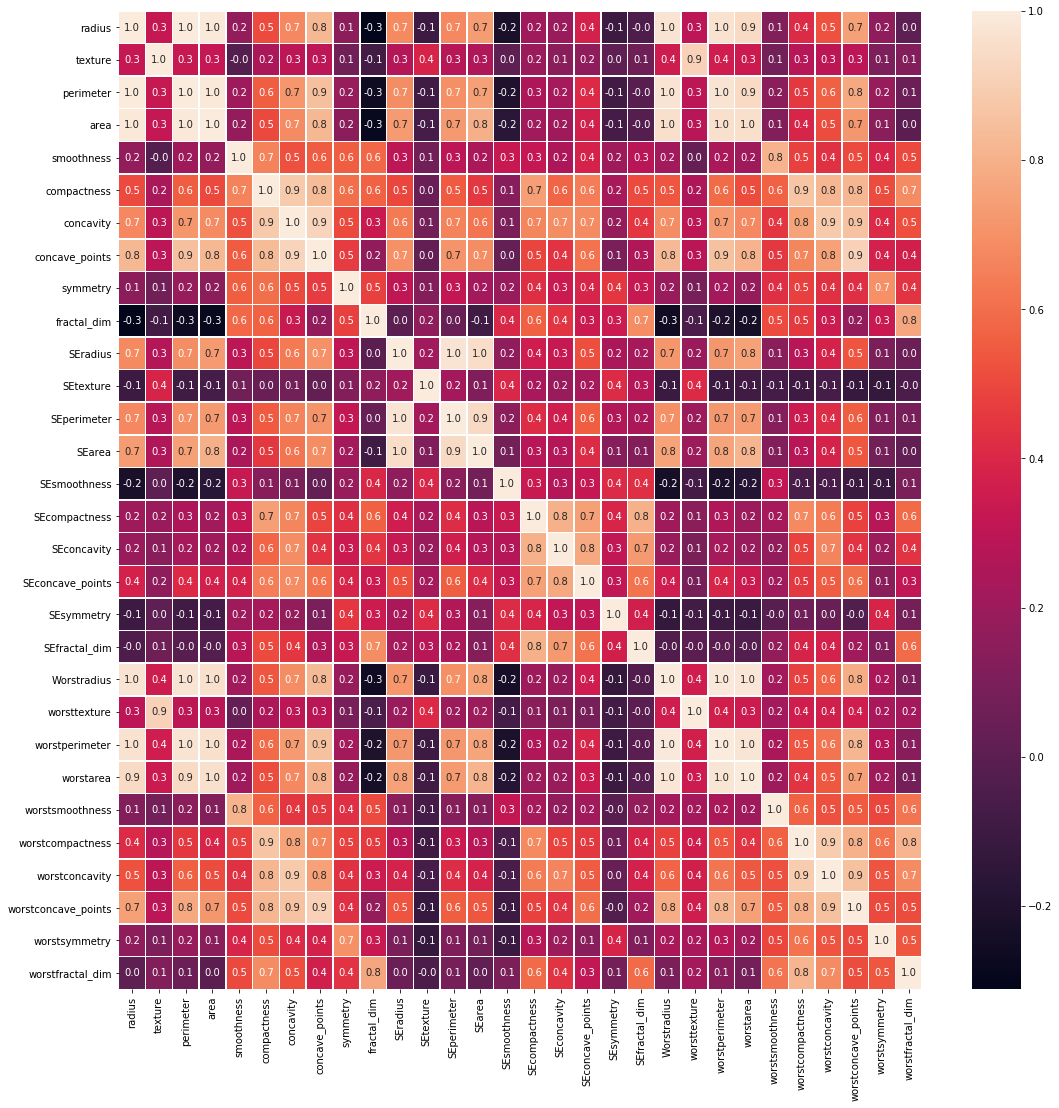

In [21]:
f,ax = pyplot.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

# FEATURE SELECTION

La selección de caracteristicas (Feature selection), es un proceso que consiste en seleccionar las características más importantes/relevantes de un conjunto de datos. Es importante considerar

Puntaje de cada característica:
 [6.46981021e+02 1.18096059e+02 6.97235272e+02 5.73060747e+02
 8.36511234e+01 3.13233079e+02 5.33793126e+02 8.61676020e+02
 6.95274435e+01 9.34592949e-02 2.68840327e+02 3.90947023e-02
 2.53897392e+02 2.43651586e+02 2.55796780e+00 5.32473391e+01
 3.90144816e+01 1.13262760e+02 2.41174067e-02 3.46827476e+00
 8.60781707e+02 1.49596905e+02 8.97944219e+02 6.61600206e+02
 1.22472880e+02 3.04341063e+02 4.36691939e+02 9.64385393e+02
 1.18860232e+02 6.64439606e+01]


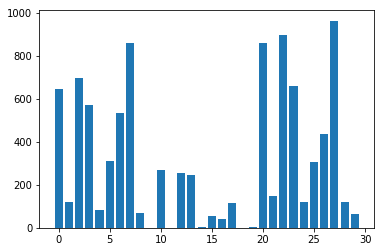

Vista de las variables seleccionadas:
 [[1.471e-01 2.538e+01 1.846e+02 2.654e-01]
 [7.017e-02 2.499e+01 1.588e+02 1.860e-01]
 [1.279e-01 2.357e+01 1.525e+02 2.430e-01]
 [1.052e-01 1.491e+01 9.887e+01 2.575e-01]
 [1.043e-01 2.254e+01 1.522e+02 1.625e-01]]


In [22]:
#Feature Selection with Univariate Statistical Test---------------------------#

# f_classif
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X.values, Y.CLASS.values)
# summarize scores
print('Puntaje de cada característica:\n',fit.scores_)
features_1 = fit.transform(X)
# plot the scores
pyplot.bar([i for i in range(len(fit.scores_))], fit.scores_)
pyplot.show()
# summarize selected features
print('Vista de las variables seleccionadas:\n',features_1[0:5,:])

Puntaje de cada característica:
 [0.36551356 0.09845657 0.4040815  0.35788966 0.07815454 0.21320346
 0.37316602 0.43985571 0.06952857 0.01324046 0.2488477  0.00674164
 0.27633725 0.34027264 0.01554097 0.07452885 0.1172606  0.12756023
 0.01145506 0.04146216 0.45175621 0.12145075 0.47595778 0.46448559
 0.10268296 0.22573675 0.31553747 0.43507759 0.09473908 0.06767492]

Vista de las variables seleccionadas:
 [[1.471e-01 2.538e+01 1.846e+02 2.019e+03]
 [7.017e-02 2.499e+01 1.588e+02 1.956e+03]
 [1.279e-01 2.357e+01 1.525e+02 1.709e+03]
 [1.052e-01 1.491e+01 9.887e+01 5.677e+02]
 [1.043e-01 2.254e+01 1.522e+02 1.575e+03]]


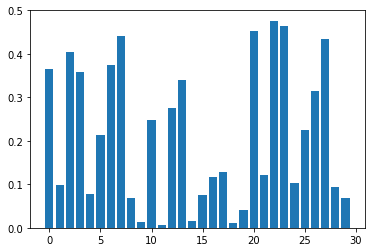


Vista de las variables seleccionadas:
 [[1.471e-01 2.538e+01 1.846e+02 2.654e-01]
 [7.017e-02 2.499e+01 1.588e+02 1.860e-01]
 [1.279e-01 2.357e+01 1.525e+02 2.430e-01]
 [1.052e-01 1.491e+01 9.887e+01 2.575e-01]
 [1.043e-01 2.254e+01 1.522e+02 1.625e-01]]


In [23]:
# mutual_info_classif
test = SelectKBest(score_func=mutual_info_classif, k=4)
fit = test.fit(X.values, Y.CLASS.values)
# summarize scores
print('Puntaje de cada característica:\n',fit.scores_)
features_2 = fit.transform(X.values)
print('\nVista de las variables seleccionadas:\n',features_2[0:5,:])

# plot the scores
pyplot.bar([i for i in range(len(fit.scores_))], fit.scores_)
pyplot.show()
# summarize selected features
print('\nVista de las variables seleccionadas:\n',features_1[0:5,:])

In [24]:
#Recursive Feature Elimination------------------------------------------------#
# Feature Selection with RFE (Recursive feature elimination) performs a greedy search to 
# find the best performing feature subset. It iteratively creates models and determines 
# the best or the worst performing feature at each iteration. It constructs the subsequent 
# models with the left features until all the features are explored.
# https://www.datacamp.com/community/tutorials/feature-selection-python
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 3)
fit = rfe.fit(X.values, Y.CLASS.values)
rfe_X = fit.support_
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)



/home/david/jupyternot/local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/david/jupyternot/local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/david/jupyternot/local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/david/jupyternot/local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/david/jupyternot/local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to conve

Num Features: 3
Selected Features: [False False False False False False False False False False  True False
 False False False False False False False False False False False False
 False False  True  True False False]
Feature Ranking: [ 5 19 23 26 18 11  3  7 16 25  1  8  6 14 28 12 20 22 24 27 17  9 10 21
 15  2  1  1  4 13]


/home/david/jupyternot/local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/david/jupyternot/local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/david/jupyternot/local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [25]:
model = SVC(kernel="linear")
rfe = RFE(model, 5, step=1)
fit = rfe.fit(X.values, Y.CLASS.values)
svc_X = fit.support_
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True False]
Feature Ranking: [ 4 17 12 26  9  8  5  6  7 23 21  2 10 18 19 15 14 16 24 22  3 11 20 25
  1  1  1  1  1 13]


https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

L1-based feature selection

In [26]:
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

print('Tamaño del dataset original',X.shape)

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X.values, Y.CLASS.values)
model = SelectFromModel(lsvc, prefit=True, max_features=5)
X_new = model.transform(X.values)
model_LinearSVC_X = model.get_support()
print("Selected Features: %s" % model.get_support())
print(X_new.shape)

Tamaño del dataset original (569, 30)
Selected Features: [False False  True  True False False False False False False False False
 False  True False False False False False False False  True False  True
 False False False False False False]
(569, 5)


/home/david/jupyternot/local/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Tree-based feature selection

In [27]:
from sklearn.ensemble import ExtraTreesClassifier

print('Tamaño del dataset original',X.shape)
clf = ExtraTreesClassifier(n_estimators=50) #n_estimators: The number of trees in the forest.
clf = clf.fit(X.values, Y.CLASS.values)
print('\nImportancia de las variables:\n',clf.feature_importances_)
model = SelectFromModel(clf, prefit=True, max_features=5)
X_new = model.transform(X.values)
model_ExtraTrees_X = model.get_support()
print("Selected Features: %s" % model.get_support())
print('Tamaño del dataset transformado',X_new.shape)

Tamaño del dataset original (569, 30)

Importancia de las variables:
 [0.05738377 0.01626654 0.04071302 0.04863208 0.0096979  0.01193932
 0.09785833 0.12895143 0.0091434  0.00471376 0.02632227 0.00587991
 0.01575093 0.03800194 0.00653172 0.00798561 0.00569075 0.00835618
 0.00477482 0.00550286 0.07961892 0.02387267 0.08399376 0.07185232
 0.02141293 0.03642668 0.05435333 0.05862    0.00917679 0.01057605]
Selected Features: [False False False False False False  True  True False False False False
 False False False False False False False False  True False  True  True
 False False False False False False]
Tamaño del dataset transformado (569, 5)


In [28]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_name = X.columns.tolist()
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'RFE':rfe_X, 'SVC':svc_X, 'Model-ExtraTrees':model_ExtraTrees_X, 'Model-LinearSVC':model_LinearSVC_X})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)

,Feature,Model-ExtraTrees,Model-LinearSVC,RFE,SVC,Total
1,worstconcavity,False,False,True,True,2
2,worstconcave_points,False,False,True,True,2
3,worstarea,True,True,False,False,2
4,worsttexture,False,True,False,False,1
5,worstsymmetry,False,False,False,True,1
6,worstsmoothness,False,False,False,True,1
7,worstperimeter,True,False,False,False,1
8,worstcompactness,False,False,False,True,1
9,perimeter,False,True,False,False,1
10,concavity,True,False,False,False,1


# FEATURE EXTRACTION

In [29]:
# Feature Extraction with PCA
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.98204467 0.01617649 0.00155751]
[[ 5.08623202e-03  2.19657026e-03  3.50763298e-02  5.16826469e-01
   4.23694535e-06  4.05260047e-05  8.19399539e-05  4.77807775e-05
   7.07804332e-06 -2.62155251e-06  3.13742507e-04 -6.50984008e-05
   2.23634150e-03  5.57271669e-02 -8.05646029e-07  5.51918197e-06
   8.87094462e-06  3.27915009e-06 -1.24101836e-06 -8.54530832e-08
   7.15473257e-03  3.06736622e-03  4.94576447e-02  8.52063392e-01
   6.42005481e-06  1.01275937e-04  1.68928625e-04  7.36658178e-05
   1.78986262e-05  1.61356159e-06]
 [ 9.28705650e-03 -2.88160658e-03  6.27480827e-02  8.51823720e-01
  -1.48194356e-05 -2.68862249e-06  7.51419574e-05  4.63501038e-05
  -2.52430431e-05 -1.61197148e-05 -5.38692831e-05  3.48370414e-04
   8.19640791e-04  7.51112451e-03  1.49438131e-06  1.27357957e-05
   2.86921009e-05  9.36007477e-06  1.22647432e-05  2.89683790e-07
  -5.68673345e-04 -1.32152605e-02 -1.85961117e-04 -5.19742358e-01
  -7.68565692e-05 -2.56104144e-04 -1.75471479e-04 -3